### **Mount drive**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd {'/content/drive/MyDrive/Kaggle'}

/content/drive/MyDrive/Kaggle


### **Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model, svm, datasets, neighbors, tree, naive_bayes
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, LeaveOneOut
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score


# **Load data created in previous notebook**

In [4]:
import os
import pickle
with open('Datasets/data_encoded.pickle', 'rb') as file:
    dict_prepared = pickle.load(file)
with open('Datasets/data_encoded_minmax.pickle', 'rb') as file:
    dict_prepared_minmax = pickle.load(file)
with open('Datasets/data_encoded_std.pickle', 'rb') as file:
    dict_prepared_std = pickle.load(file)

In [5]:
X_train = dict_prepared['X_train']
X_test = dict_prepared['X_test']
y_train = dict_prepared['y_train']
y_test = dict_prepared['y_test']
X_train_minmax = dict_prepared_minmax['X_train']
X_test_minmax = dict_prepared_minmax['X_test']
X_train_std = dict_prepared_std['X_train']
X_test_std = dict_prepared_std['X_test']

Precision recall curve and ROC curve are two methods that allow us to know which will be the probabilities of obtaining the positive or negative class from a binary variable.

# **Precision Recall Curve**

We are going to study only the models we've seen work better. And as we've seen all train and test sample give similar results, we will use the ones that are not scaled.

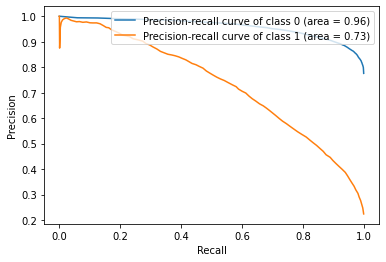

In [10]:
#RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
probs = rf.predict_proba(X_test)

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}

plt.figure()
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])

    plt.plot(
        recall[i],
        precision[i],
        label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i])
    )
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right") 

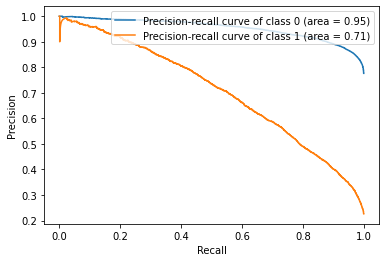

In [11]:
#XGBoost classifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
probs = xg.predict_proba(X_test)

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}

plt.figure()
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, probs[:, i])

    plt.plot(
        recall[i],
        precision[i],
        label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i])
    )
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right") 

# **ROC curve** 

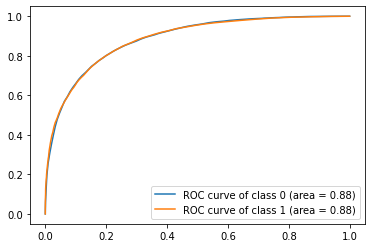

In [12]:
#RandomForest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
probs = rf.predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(2):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

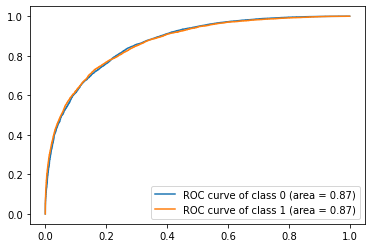

In [13]:
#XGBoost classifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
probs = xg.predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(2):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

As our dataset isn't balanced, it is better to look at the precision-recall curve which shows that the negative class is almost classified without making any errors. On the other side, the positive class makes mistakes as we have less instances to learn from.